In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
dataset = pd.read_csv('test_all.csv', encoding = 'ISO-8859-1')

In [3]:
dataset = dataset.sample(frac = 1)

In [4]:
train_dataset = dataset.sample(frac=0.70,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [5]:
train_stats = train_dataset.describe()
train_stats.pop("class")
train_stats = train_stats.transpose()

In [6]:
train_labels = train_dataset.pop('class')
test_labels = test_dataset.pop('class')

In [7]:
labelencoder = LabelEncoder()
train_labels = labelencoder.fit_transform(train_labels)
train_labels = np_utils.to_categorical(train_labels)

In [8]:
test_labels = labelencoder.fit_transform(test_labels)
test_labels = np_utils.to_categorical(test_labels)

In [9]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [10]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [11]:
model = Sequential()
model.add(Dense(units = 128, activation = 'relu', input_dim = 5))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 4, activation = 'softmax'))

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
                  metrics = ['categorical_accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dense_6 (Dense)             (None, 4)                 2

In [14]:
model.fit(
    normed_train_data, train_labels,
    epochs=1000,
    batch_size=64
)

Epoch 1/1000
97/97 [==============================] - 1s 5ms/step - loss: 1.3887 - categorical_accuracy: 0.2570
Epoch 2/1000
97/97 [==============================] - 1s 5ms/step - loss: 1.3865 - categorical_accuracy: 0.2583
Epoch 3/1000
97/97 [==============================] - 1s 5ms/step - loss: 1.3864 - categorical_accuracy: 0.2592
Epoch 4/1000
97/97 [==============================] - 1s 7ms/step - loss: 1.3866 - categorical_accuracy: 0.2464
Epoch 5/1000
97/97 [==============================] - 0s 5ms/step - loss: 1.3867 - categorical_accuracy: 0.2488
Epoch 6/1000
97/97 [==============================] - 0s 5ms/step - loss: 1.3863 - categorical_accuracy: 0.2559
Epoch 7/1000
97/97 [==============================] - 0s 5ms/step - loss: 1.3861 - categorical_accuracy: 0.2626
Epoch 8/1000
97/97 [==============================] - 0s 5ms/step - loss: 1.3866 - categorical_accuracy: 0.2553
Epoch 9/1000
97/97 [==============================] - 0s 5ms/step - loss: 1.3865 - categorical_accuracy:

In [15]:
score = model.evaluate(normed_test_data, test_labels)

83/83 [==============================] - 0s 2ms/step - loss: 8.7193 - categorical_accuracy: 0.2536


In [16]:
test_predictions = model.predict(normed_test_data)

83/83 [==============================] - 0s 2ms/step


In [17]:
class_predict = [np.argmax(t) for t in test_labels]
predict = [np.argmax(t) for t in test_predictions]

In [18]:
matriz = confusion_matrix(predict, class_predict)
print(matriz)

[[181 173 158 165]
 [149 178 174 157]
 [164 155 147 147]
 [186 172 175 165]]


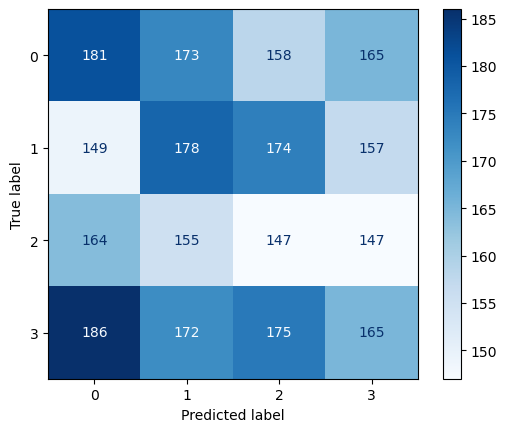

In [19]:
labels = [0, 1, 2, 3]
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()